# ADVANCED COMPUTER VISION
## Assignment 3
### Ishang Kansal | E22CSEU0320

In [1]:
import cv2 # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import math as Math

img = cv2.imread("Lena_Image.png")


In [2]:
height, width, _ = img.shape
print("height:", height)
print("width:", width)

total_pixels = height*width
print("Total Pixels = ", total_pixels)

height: 512
width: 512
Total Pixels =  262144


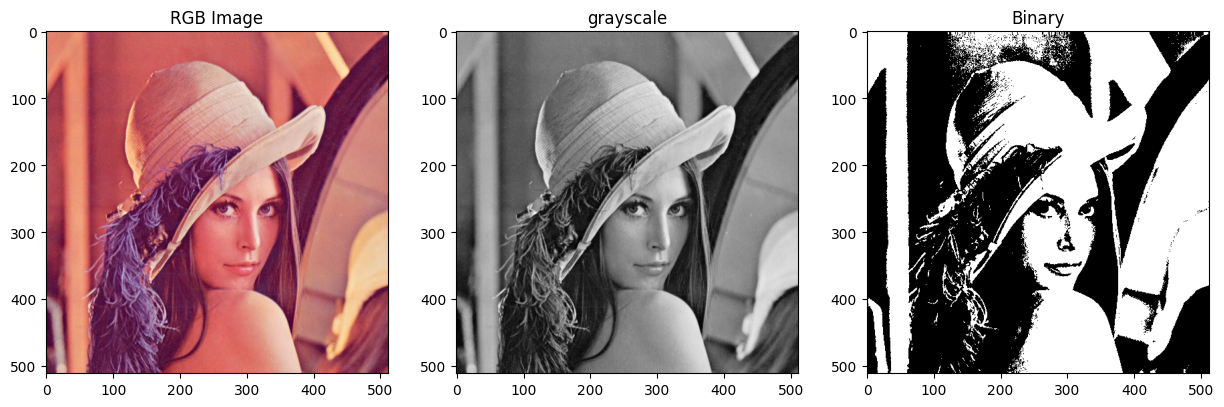

In [3]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
grayscale = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)
_,Binary = cv2.threshold(grayscale, 128, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title("RGB Image")
plt.imshow(rgb, cmap='gray')
plt.subplot(1,3,2)
plt.title("grayscale")
plt.imshow(grayscale, cmap='gray')
plt.subplot(1,3,3)
plt.title("Binary")
plt.imshow(Binary, cmap='gray')
plt.show()

In [4]:
black_pixels = np.sum(Binary == 0)
print("Black pixels : ", black_pixels)

Black pixels :  130547


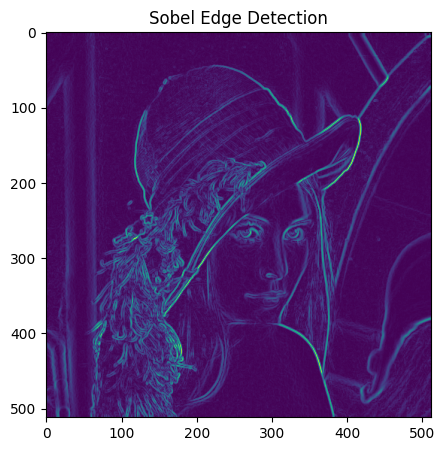

In [5]:
sobel_x = cv2.Sobel(grayscale, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(grayscale, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobel_x, sobel_y)

plt.figure(figsize=(5,5))

plt.imshow(sobel)
plt.title("Sobel Edge Detection")
plt.show()

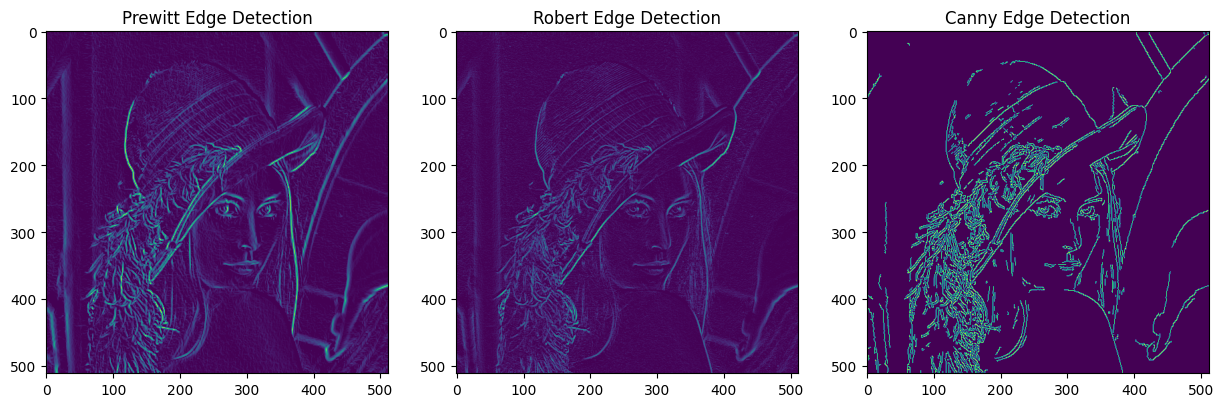

In [6]:
prewitt_x = cv2.filter2D(grayscale, -1, np.array([[-1, 0, 1],[-1, 0, 1], [-1, 0, 1]]))
prewitt_y = cv2.filter2D(grayscale, -1, np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]]))
prewitt = cv2.magnitude(prewitt_x.astype(np.float32), prewitt_y.astype(np.float32))
    
roberts_x = cv2.filter2D(grayscale, -1, np.array([[1, 0], [0, -1]]))
roberts_y = cv2.filter2D(grayscale, -1, np.array([[0, 1], [-1, 0]]))
roberts = cv2.magnitude(roberts_x.astype(np.float32), roberts_y.astype(np.float32))

canny = cv2.Canny(grayscale, 100, 150)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(prewitt)
plt.title("Prewitt Edge Detection")
plt.subplot(1,3,2)
plt.imshow(roberts)
plt.title("Robert Edge Detection")
plt.subplot(1,3,3)
plt.imshow(canny)
plt.title("Canny Edge Detection")
plt.show()

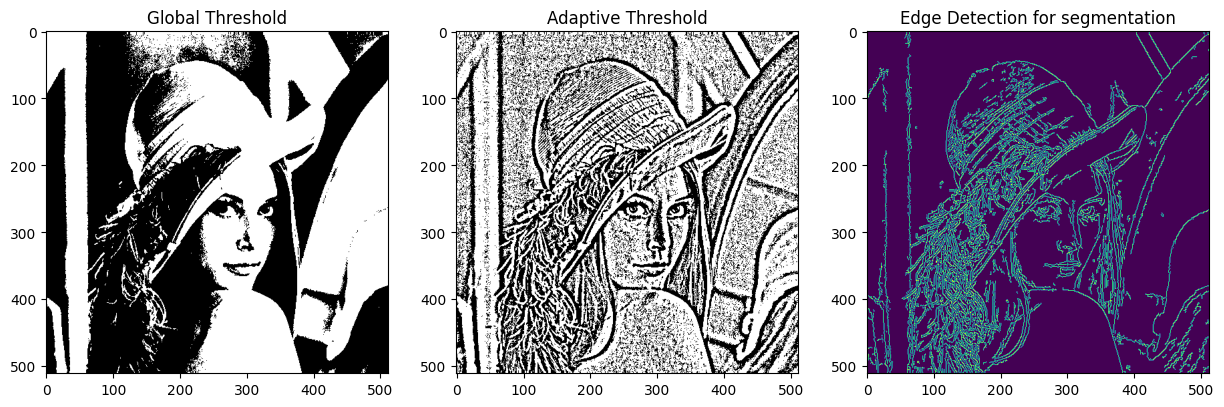

In [7]:
_, global_thresh = cv2.threshold(grayscale, 127, 255, cv2.THRESH_BINARY)

adaptive_thresh = cv2.adaptiveThreshold(grayscale, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

edge_based_segmentation = cv2.Canny(grayscale, 50, 100)


plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(global_thresh, cmap='gray')
plt.title("Global Threshold")
plt.subplot(1,3,2)
plt.imshow(adaptive_thresh, cmap='gray')
plt.title("Adaptive Threshold")
plt.subplot(1,3,3)
plt.imshow(edge_based_segmentation)
plt.title("Edge Detection for segmentation")
plt.show()

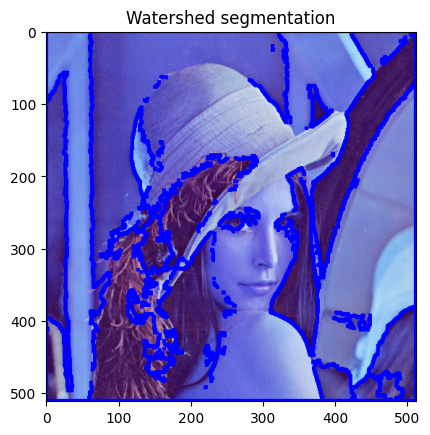

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)
sure_bg = cv2.dilate(opening, kernel, iterations=3)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
_, markers = cv2.connectedComponents(global_thresh)
markers = markers + 1
markers[unknown == 255] = 0
img_watershed = img.copy()
cv2.watershed(img_watershed, markers)
watershed_result = img.copy()

boundary_mask = np.uint8(markers == -1) * 255
kernel_dilate = np.ones((3, 3), np.uint8)
thick_boundaries = cv2.dilate(boundary_mask, kernel_dilate, iterations=2)
watershed_result[thick_boundaries == 255] = [0, 0, 255]


plt.imshow(watershed_result, cmap="gray")
plt.title("Watershed segmentation")
plt.show()